Consider only the below columns and prepare a prediction model for predicting Price.
<br>
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


### EDA

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [40]:
col = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]

In [43]:
data2 = data[col]
data2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [47]:
data3 = data2.rename({"Age_08_04" : "Age","cc" : "CC","Quarterly_Tax" : "QT"},axis = 1)
data3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [49]:
data3[data3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [53]:
data3 = data3.drop_duplicates()   # Removing duplicate row. 

In [54]:
data3.shape

(1435, 9)

In [56]:
data3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [58]:
data3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


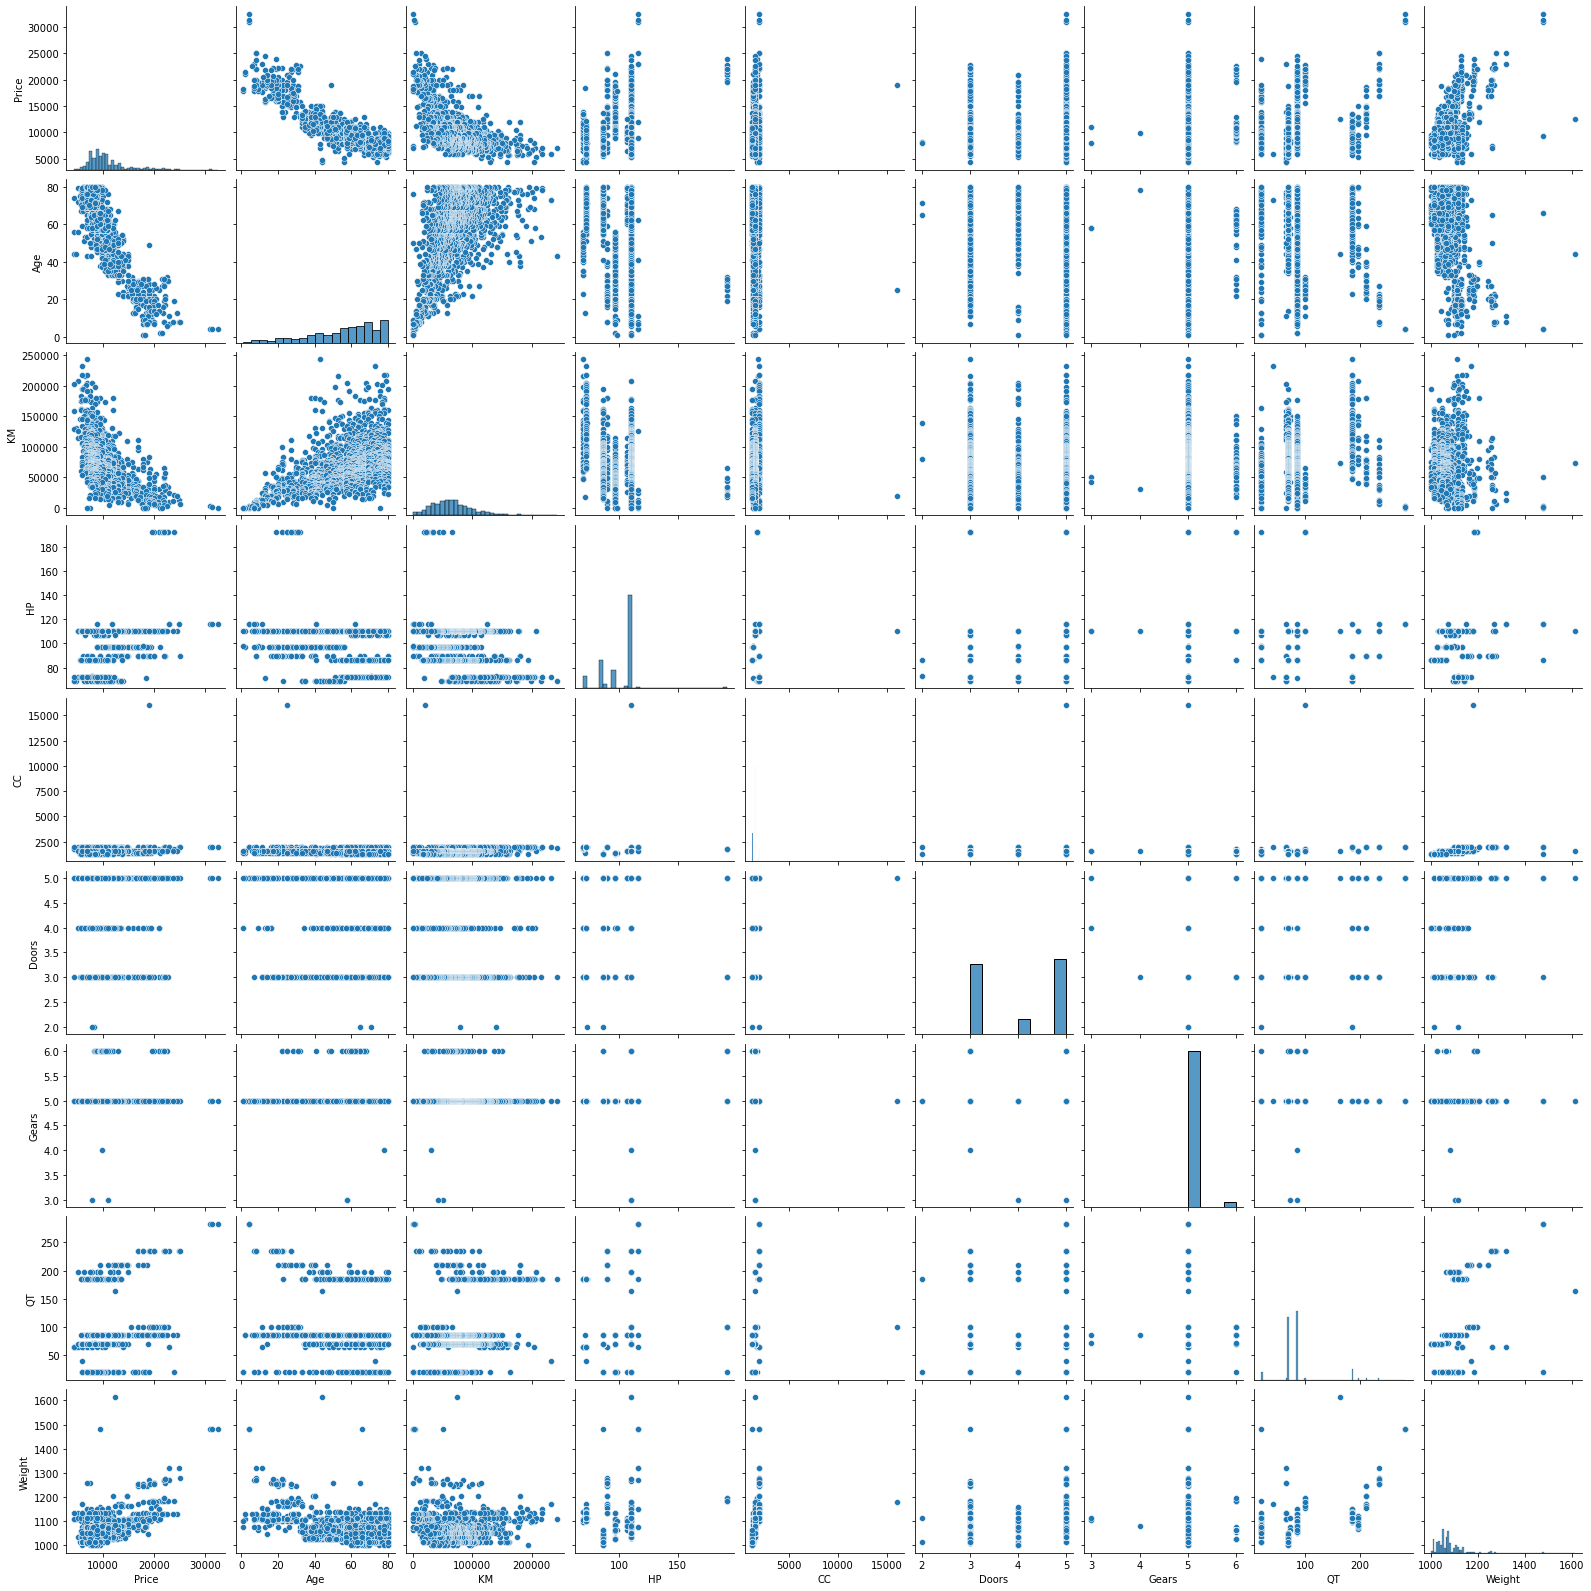

In [62]:
sns.pairplot(data3)

### Model Building/Testing 

In [64]:
import statsmodels.formula.api as smf

model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data3).fit()

In [65]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [66]:
model.tvalues

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64

In [67]:
model.pvalues

Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64

In [69]:
print(model.rsquared,model.rsquared_adj)

0.8625200256947 0.8617487495415146


### Model Validaton

In [72]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_Age = smf.ols("Age ~ KM+HP+CC+Doors+Gears+QT+Weight",data = data3).fit().rsquared
vif_Age = 1 / (1-rsq_Age)

In [73]:
rsq_KM = smf.ols("KM ~ Age+HP+CC+Doors+Gears+QT+Weight",data = data3).fit().rsquared
vif_KM = 1 / (1-rsq_KM)

In [74]:
rsq_HP = smf.ols("HP ~ Age+KM+CC+Doors+Gears+QT+Weight",data = data3).fit().rsquared
vif_HP = 1 / (1-rsq_HP)

In [75]:
rsq_CC = smf.ols("CC ~ Age+KM+HP+Doors+Gears+QT+Weight",data = data3).fit().rsquared
vif_CC = 1 / (1-rsq_CC)

In [77]:
rsq_Doors = smf.ols("Doors ~ Age+KM+HP+CC+Gears+QT+Weight",data = data3).fit().rsquared
vif_Doors = 1 / (1-rsq_Doors)

In [78]:
rsq_Gears = smf.ols("Gears ~ Age+KM+HP+CC+Doors+QT+Weight",data = data3).fit().rsquared
vif_Gears = 1 / (1-rsq_Gears)

In [79]:
rsq_QT = smf.ols("QT ~ Age+KM+HP+CC+Doors+Gears+Weight",data = data3).fit().rsquared
vif_QT = 1 / (1-rsq_QT)

In [80]:
rsq_Weight = smf.ols("Weight ~ QT+Age+KM+HP+CC+Doors+Gears",data = data3).fit().rsquared
vif_Weight = 1 / (1-rsq_Weight)

In [88]:
d1 = {"Variable's":['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
      "VIF":[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}

In [89]:
VIF_Frame  = pd.DataFrame(d1)
VIF_Frame

,Variable's,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [90]:
# 2) Residual analysis check
import statsmodels.api as sm
import matplotlib.pyplot as plt

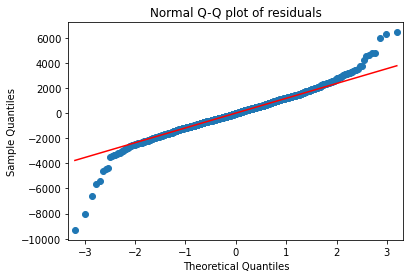

In [92]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [96]:
list(np.where(model.resid <- 6000)) # outliar detection from above QQ plot of residuals

[array([220, 600, 959], dtype=int64)]

In [102]:
list(np.where(model.resid > 6000))

[array([109, 146, 522], dtype=int64)]

In [103]:
# Residual plot for Homoscedasticity
def standard_values(vals) : return (vals-vals.mean())/vals.std()

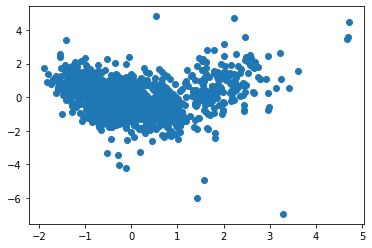

In [104]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid)) 

In [ ]:
# Residuals Vs Regressors or independent 'x' variables

eval_env: 1


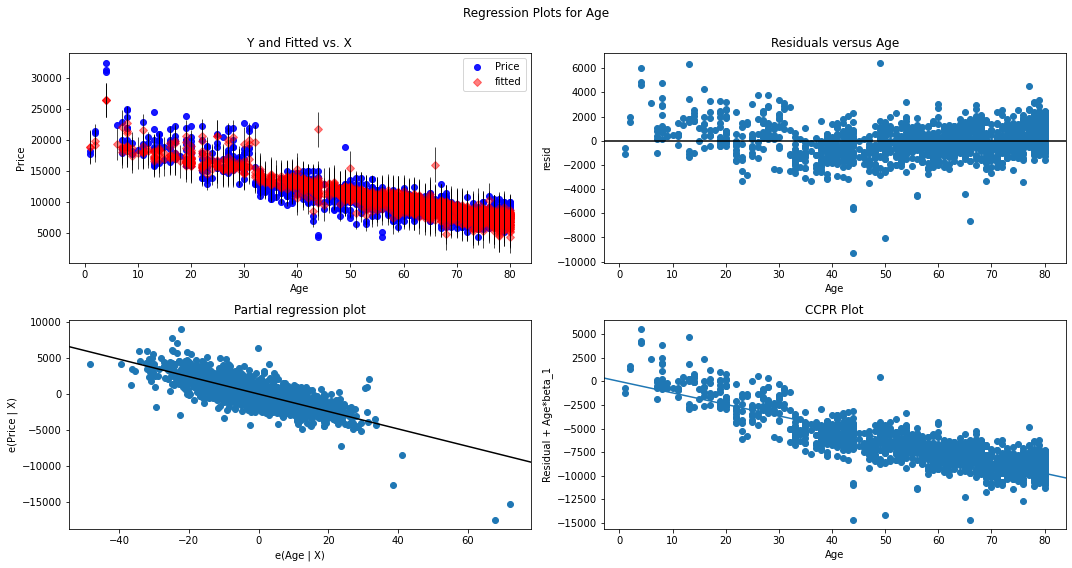

In [106]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'Age',fig = fig)
plt.show()

eval_env: 1


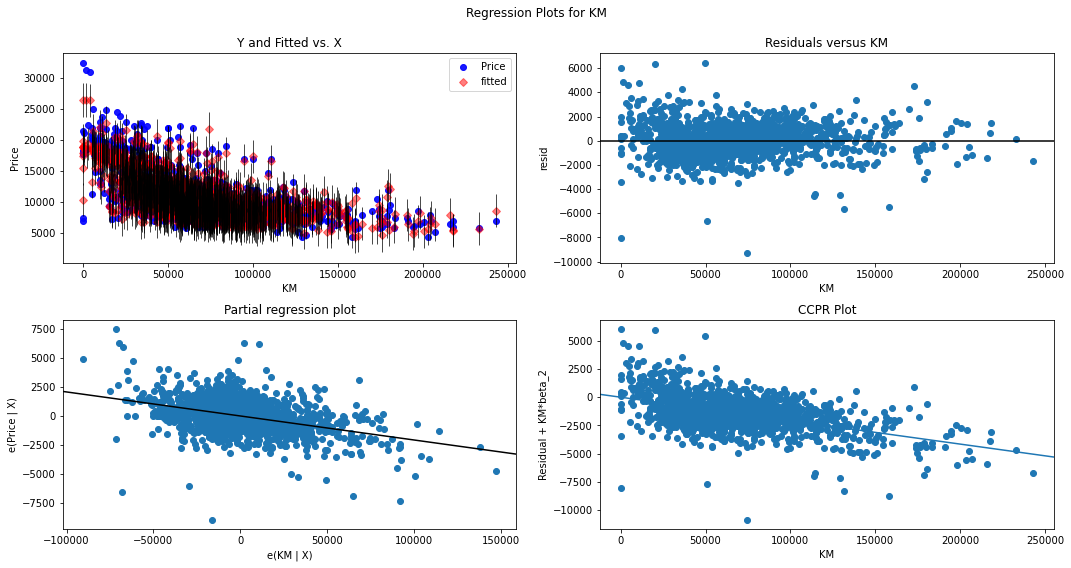

In [107]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'KM',fig = fig)
plt.show()

eval_env: 1


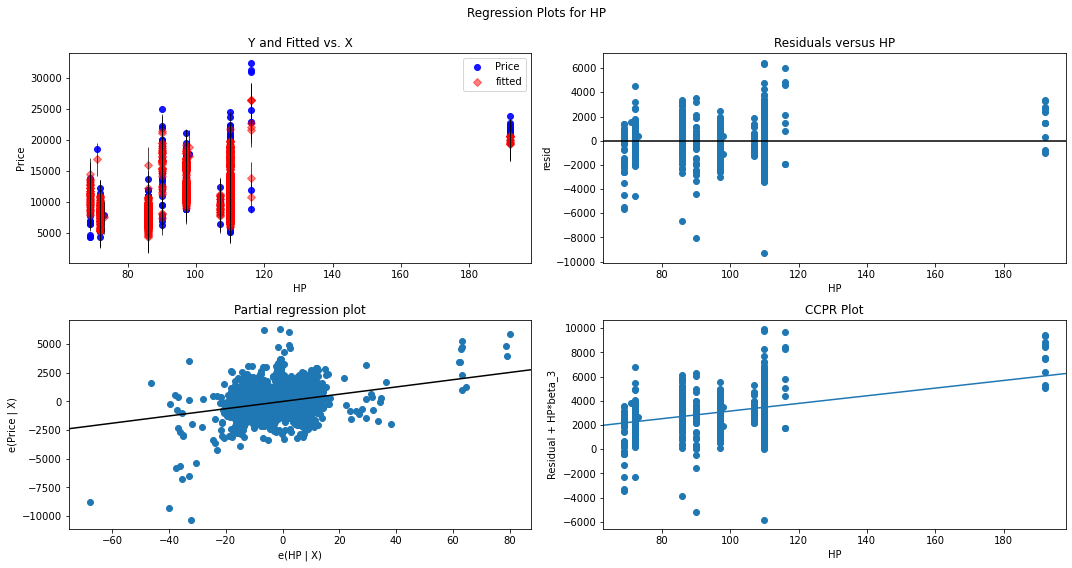

In [108]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'HP',fig = fig)
plt.show()

eval_env: 1


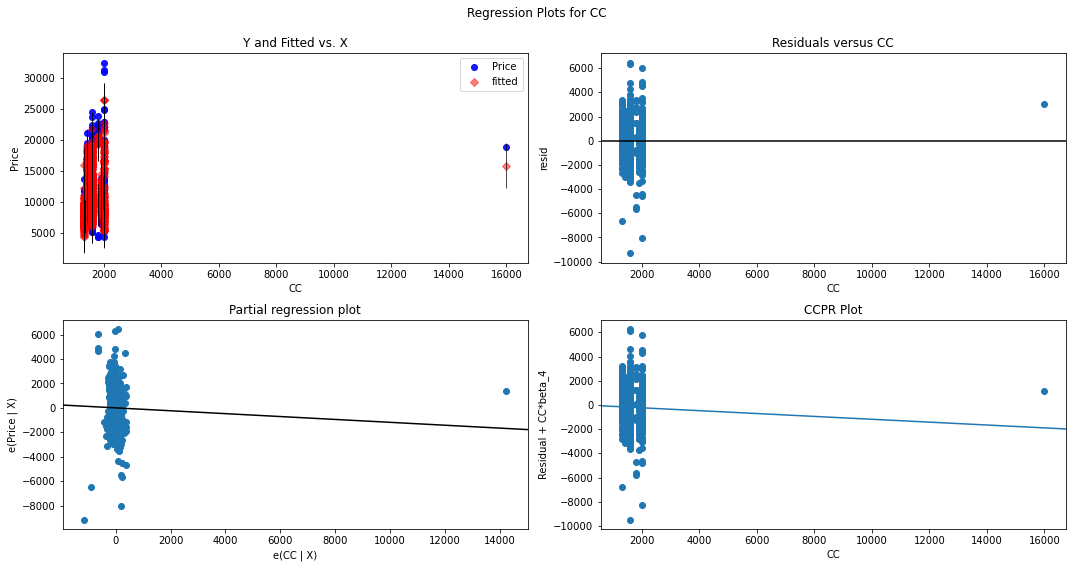

In [109]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'CC',fig = fig)
plt.show()

eval_env: 1


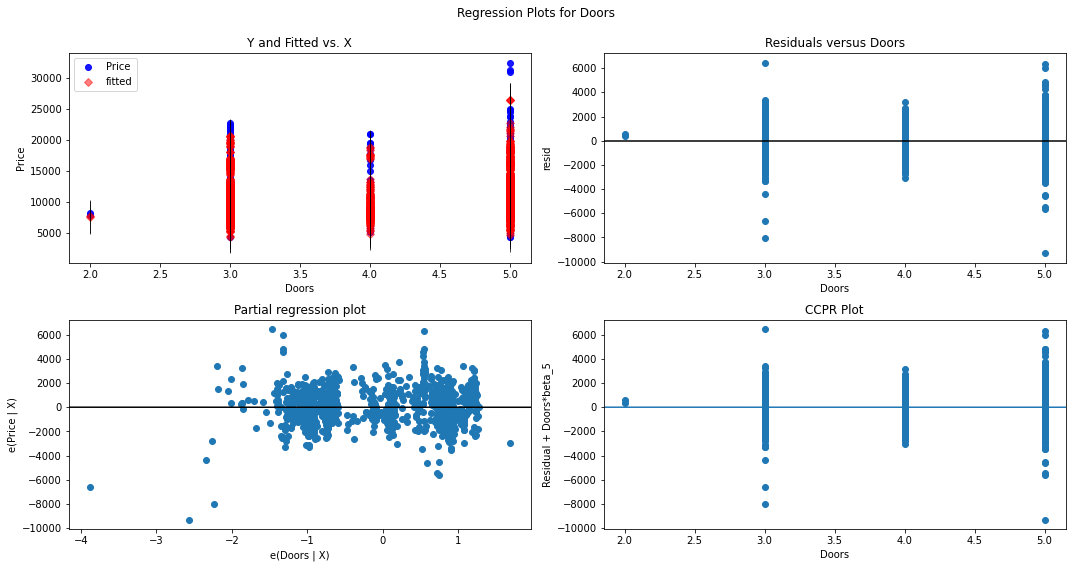

In [115]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig = fig)
plt.show()

eval_env: 1


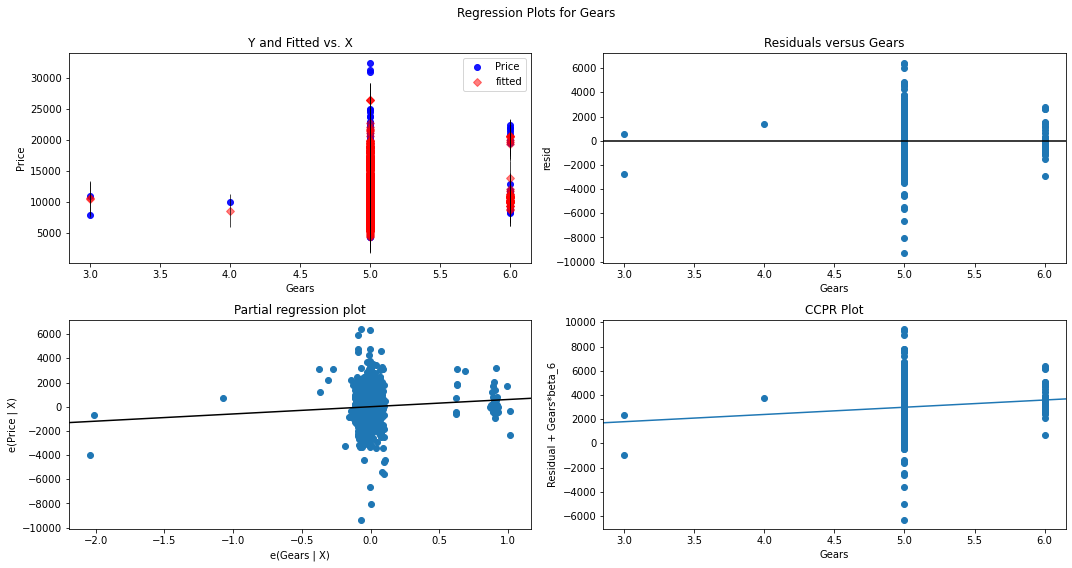

In [111]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig = fig)
plt.show()

eval_env: 1


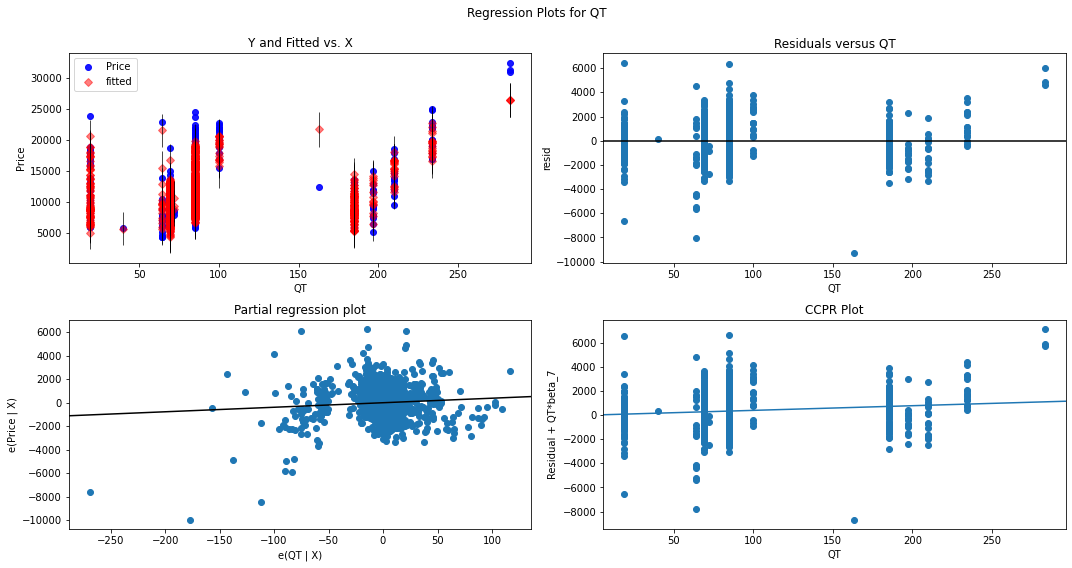

In [112]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'QT',fig = fig)
plt.show()

eval_env: 1


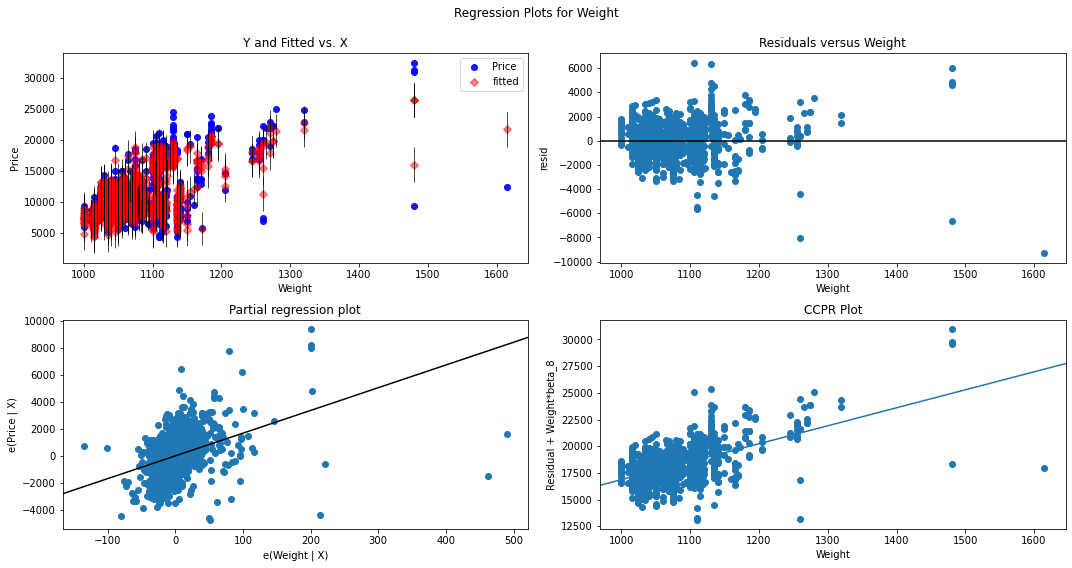

In [116]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig = fig)
plt.show()

### Model Deletion Diagnostics

In [117]:
# Checking outliers and Influencers.

# 1)Cooks Distance
(c,_) = model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

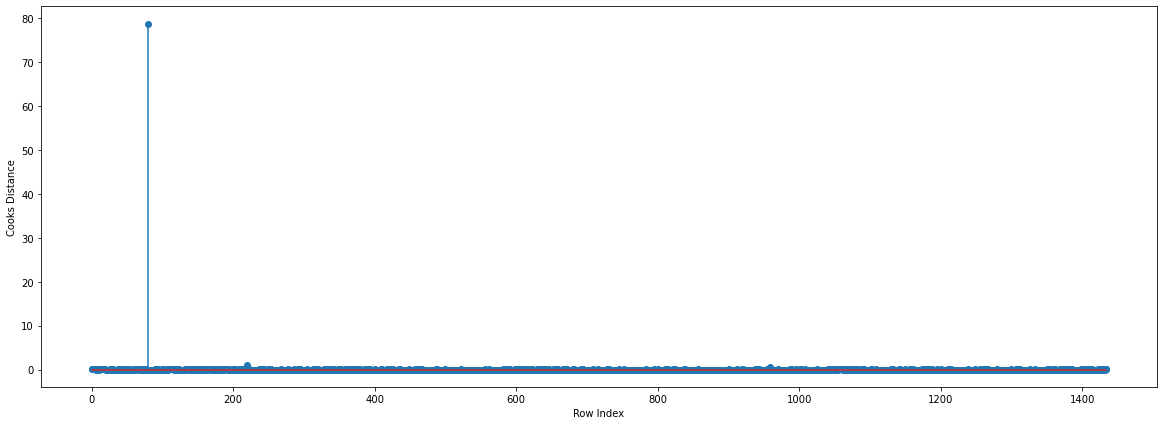

In [118]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [119]:
#index of the data points where c is more than 0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224851)

In [121]:
data3[data3.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


### Impoving the Model

In [123]:
#Removing 80 observation and Reset the index,re arrange the row values
data4 = data3.drop(data3.index[[80]],axis = 0).reset_index(drop = True)
data4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


### Model Deletion Diagnostics And Final Model

In [125]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data4).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data4=data4.drop(data4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data4
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data4).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392296
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [126]:
final_model.rsquared

0.9003762532318559

In [128]:
data4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


### Model Predictions

In [129]:
new_data = pd.DataFrame({"Age":30, "KM":6000 ,"HP":70 ,"CC":1500 ,"Doors":3 ,"Gears":5 ,"QT":90 ,"Weight":1000},index = [1])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
1,30,6000,70,1500,3,5,90,1000


In [130]:
final_model.predict(new_data)

1    11904.304849
dtype: float64

In [139]:
# Automatic Prediction of Price with 90 % accuracy
pred_y=final_model.predict(data4)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64